In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [29]:
import numpy as np
from functions import CFloader, splt
import matplotlib.pyplot as plt

savedir = "B01/"

In [30]:
data = CFloader.load_data( "CloudVenetoAnalysis/default_20220508" )

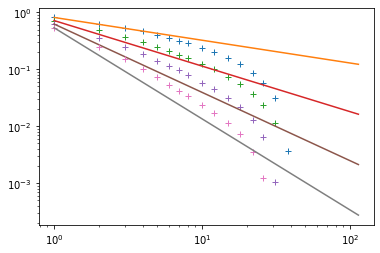

In [32]:
for d in data:
    plt.plot( d['CF_D']['x'], d['CF_D']['y'], '+' )
    x = np.array( d['CF_D']['x'] )
    y = x** ( - d['gamma'] ) * d['CF_D']['y'][0]
    plt.plot( x, y ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )